In [127]:
import sys
sys.path.insert(0, '../Diamond_Music') # you must have already obtained the Diamond_Music repo from github and put it in the right dir.
import diamond_music_utils as dmu
import adaptive_tuning_util as atu
import numpy as np
rng = np.random.default_rng()
import os
from importlib import reload
import music21 as m21
import logging
from itertools import count, combinations, permutations
import matplotlib.pyplot as plt
import pprint as pp
# some constants 

flats = True # set this to False if the key uses sharps. It will later get set based on reading the key signature from the corpus.
keys = atu.set_accidentals(flats)
CSD_FILE = 'ball9.csd'
JUPYTER_LOG = 'ball9.log'
dmu.start_logger(JUPYTER_LOG)
CS_LOGNAME = 'ball9.log'
MIDI_DIR = '.' 
NUMPY_DIR = 'eval/numpy_chorales'
WAVE_DIR = '../../../Music/sflib'
m21.environment.set('musescoreDirectPNGPath', '/usr/bin/musescore') # required for finding mscore


In [128]:
voice_time = atu.init_voice_time()
pp.pprint(voice_time, sort_dicts=False)

{'fing1': {'full_name': 'finger piano 1',
           'start': 0,
           'csound_voice': 1,
           'time_tracker_number': 0,
           'volume_factor': 0,
           'min_oct': 2,
           'max_oct': 7},
 'fing2': {'full_name': 'finger piano 2',
           'start': 0,
           'csound_voice': 1,
           'time_tracker_number': 1,
           'volume_factor': 0,
           'min_oct': 2,
           'max_oct': 7},
 'fing3': {'full_name': 'finger piano 3',
           'start': 0,
           'csound_voice': 1,
           'time_tracker_number': 2,
           'volume_factor': 0,
           'min_oct': 2,
           'max_oct': 7},
 'bfin1': {'full_name': 'bass finger piano 1',
           'start': 0,
           'csound_voice': 24,
           'time_tracker_number': 3,
           'volume_factor': 1,
           'min_oct': 1,
           'max_oct': 5},
 'fing4': {'full_name': 'finger piano 4',
           'start': 0,
           'csound_voice': 1,
           'time_tracker_number': 4,
      

In [129]:
# List all the works available by Bach: 
paths = m21.corpus.getComposer('bach')
print(*paths, sep = '\n')

/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv1.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv10.7.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv101.7.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv102.7.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv103.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv104.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv108.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv11.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv110.7.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv111.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus

In [130]:
top_notes_dictionary = {} # this is where we will store the top_notes for each chorale, one at a time
version = 'bwv245.15'
top_notes_dictionary[version] = np.array([[  4,   9,   11,   2,   0,   5,   8], [ 400, 898, 1102, 196,  14, 512, 786]])
version = "bwv245.17"
top_notes_dictionary[version] = np.array([[   9,   4,   0,    5,   2,   11], [ 900, 402,  16,  514, 198, 1104]])
version = "bwv245.22"
top_notes_dictionary[version] = np.array([[  11,   4,   8,   6,  1,   3], [1100, 398, 784, 602, 82, 286]])
version = "bwv245.26"
top_notes_dictionary[version] = np.array([[   3,  10,    7,    0,   2,   5], [ 300, 1002, 686, 1184, 188, 504]])
version = "bwv245.28"
top_notes_dictionary[version] = np.array([[   4,   9,  1,   11,   8,   6,   2], [ 400, 898, 84, 1102, 786, 582, 196]])
version = "bwv245.3"
top_notes_dictionary[version] = np.array([[   7,   2,   10,   5,   9,   6], [ 700, 202, 1016, 518, 904, 588]]) 
version = "bwv245.37"
top_notes_dictionary[version] = np.array([[   5,  10,   1, 0,   6,   3], [ 500, 998, 114, 2, 612, 296]]) 
version = "bwv245.40"
top_notes_dictionary[version] = np.array([[   3,   10,   7,    0,   2,   8], [ 300, 1002, 686, 1184, 188, 798]]) 
version = "bwv245.5"
top_notes_dictionary[version] = np.array([[  9,   2,   4,   5,  0,   7], [900, 198, 402, 514, 16, 696]])
version = "bwv245.11"
top_notes_dictionary[version] = np.array([[  4,   9,  1,   11,   8,   6], [400, 898, 84, 1102, 786, 582]]) # bwv245.11
version = "bwv245.14"
top_notes_dictionary[version] = np.array([[  9,  4,   1,   11,   6,   8,   2], [900, 402, 86, 1104, 584, 788, 198]]) # bwv245.11

pp.pprint(top_notes_dictionary, sort_dicts=False)

{'bwv245.15': array([[   4,    9,   11,    2,    0,    5,    8],
       [ 400,  898, 1102,  196,   14,  512,  786]]),
 'bwv245.17': array([[   9,    4,    0,    5,    2,   11],
       [ 900,  402,   16,  514,  198, 1104]]),
 'bwv245.22': array([[  11,    4,    8,    6,    1,    3],
       [1100,  398,  784,  602,   82,  286]]),
 'bwv245.26': array([[   3,   10,    7,    0,    2,    5],
       [ 300, 1002,  686, 1184,  188,  504]]),
 'bwv245.28': array([[   4,    9,    1,   11,    8,    6,    2],
       [ 400,  898,   84, 1102,  786,  582,  196]]),
 'bwv245.3': array([[   7,    2,   10,    5,    9,    6],
       [ 700,  202, 1016,  518,  904,  588]]),
 'bwv245.37': array([[  5,  10,   1,   0,   6,   3],
       [500, 998, 114,   2, 612, 296]]),
 'bwv245.40': array([[   3,   10,    7,    0,    2,    8],
       [ 300, 1002,  686, 1184,  188,  798]]),
 'bwv245.5': array([[  9,   2,   4,   5,   0,   7],
       [900, 198, 402, 514,  16, 696]]),
 'bwv245.11': array([[   4,    9,    1,   11,   

In [131]:
# load the chorale from the Music21 corpus into a numpy array as (notes, voices)
def assign_chorale(version, quantizer = 4):
    chorale, root, mode, s = atu.read_from_corpus(version, quantizer = quantizer)
    logging.info(f'{chorale.shape = }, {root = }, {mode = }')
    sChords = s.chordify()
    saved_chords = np.array([str(m.analyze('key')) for m in sChords.getElementsByClass('Measure')])      
    print(*saved_chords, sep = '\t')
    print(f'{top_notes_dictionary[version] = }')
    return chorale, root, mode, s
# end of assign_chorale

def show_chorale(s):
    s.show()
    s.write("midi", version + ".mid")
# end of show_chorale    

In [132]:
def finger_piano_part(chorale, repeats, voice_names, voice_time, tpq, volume_function, probs = None):
      if probs is None:
            probs = [[0.99, 0.01],
            [0.95627622, 0.04372378]]
      logging.info(f'in finger_piano_part. {chorale.shape = }, {repeats = }, {voice_names = }, {probs = }')
      voices = voice_names.shape[0] # if you want it to last twice as long, make twice as many voices: voice_names.shape[0] * 2, or increase the value of repeats
      chorale = np.repeat(chorale, repeats, axis = 1) # make each note repeats times as long
      logging.info(f'after repeating each note {repeats = }: {chorale.shape = }')
      chorale = np.repeat(chorale, voices // 4, axis = 0)
      logging.info(f'after doubling voices: {chorale.shape = }') # (8, 3216, 2)
      # revised volume_array use a spline function 5/21/23
      logging.info(f'{volume_function = }') # array([7, 7, 1, 3, 1, 1, 1, 4, 6]) # 9 elements, could be another number
      sustain = 15 # was 8                                        # 3216 // (12 * 8) = 33
      volume_array = dmu.build_density_function(volume_function, int(np.ceil(chorale.shape[1] / (repeats * sustain)))) # (33,)
      logging.info(f'{volume_array.shape = }') # volume_array.shape = (33,)
      volume_array = np.clip(np.repeat(volume_array, repeats * sustain, axis = 0), 0, 10)
      volume_array = volume_array[:chorale.shape[1]] # truncate it to the length of the chorale
      volume_array = volume_array[:-24] # truncate it to just short of the lenth of the chorale, let the winds finish on their own.
      logging.info(f'after repeat & clip: {volume_array.shape = }, {repeats = }, {sustain = }')
      # revised 3/22/23 - 3/28/23

      # revise 4/7/23 to move build_notes_features earlier in the stack.
      logging.debug(f'{chorale.shape = }') # all must be the same shape, (2,2), (3,2) etc. 
      gls = np.array([[0, 0], [0, 0], [0, 0], [0, 0]])
      gls_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      ups = np.array([[-1, 0], [-2, 1], [1, 2], [-2, -1]])
      ups_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      env = np.array([[1, 0], [2, 8], [16, 17], [2, 8]])
      env_p = np.array([[.5, .5], [.8, .2], [.5, .5], [.5, .5] ])
      vel = np.array([[71, 74], [74, 77], [76, 79], [73, 76]])
      vel_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      guev_array = np.stack((gls, gls_p, ups, ups_p, env, env_p, vel, vel_p), axis = 0)
      rng.shuffle(guev_array, axis=1)
      logging.info(f'In finger piano. feature array after stack. {guev_array.shape = }') # guev_array.shape = (8, 3, 2)
      # determine values for gliss, upsample, envelope, and velocity arrays
      notes_features_6 = atu.add_features(chorale, guev_array) # start with the chorale, which is (notes, octaves), and add the gls, ups, env, vel arrays
      logging.debug([np.unique(feature, return_counts=True) for feature in notes_features_6])
      octave_array = notes_features_6[1] # all the octaves for all the voices, notes
      # create an array to mask some notes so that octave = 0, which makes them silent
      density_function = np.array([rng.choice(2, size = (voices, (repeats // 2) - 1), p = prob) for prob in probs]).reshape(voices, -1) # This will be used over and over again throughout the piece.
      logging.info(f'after first creation: {density_function.shape = }') # (8,24)
      logging.info(f'after creation: {np.sum(density_function) = }')
      density_function = np.concatenate((np.full((voices, 1), rng.choice(2), dtype = int), density_function), axis = 1) # make sure the down beat is always either all zeros or all ones, probabilistically.
      logging.info(f'after adding ones to first beat: {density_function.shape = }')
      density_function = np.tile(density_function, chorale.shape[1] // density_function.shape[1] + 1)
      logging.info(f'after tiling: {np.sum(density_function) = }')
      logging.info(f'{octave_array.shape = }, {density_function.shape = }') # octave_array.shape = (8, 6480), density_function.shape = (8, 6500)
      # changed on 5/21/23 - make sure it doesn't mess up the octaves as zeros
      octave_alteration_mask = atu.build_octave_alteration_mask(repeats, voices, chorale, octave_reduce = 2, octave_stretch = 5, p1 = [0.05, .3, .3, .3, .05]) 
      logging.info('finger_piano_part. octave_alteration_mask buckets: values, counts')
      logging.info([np.unique(octave, return_counts=True) for octave in octave_alteration_mask])
      logging.info(f'{octave_alteration_mask.shape = }')
      logging.info('octave_array prior to spread (values, counts): ')
      logging.info([np.unique(octave, return_counts=True) for octave in octave_array])
      for voice in np.arange(octave_array.shape[0]):
            for note in np.arange(octave_array.shape[1]):
                  if octave_array[voice, note] > 0: octave_array[voice, note] += octave_alteration_mask[voice, note]
      logging.info(f'before masking: {np.sum(octave_array) = }')
      logging.info(f'about to mask the octave array with the density_function: {density_function[:, :octave_array.shape[1]].shape = }')
      octave_array = octave_array * density_function[:, :octave_array.shape[1]] # make the octave go to zero for some percent of the notes
      logging.info(f'after masking. {np.sum(octave_array) = }')
      logging.info(f'{notes_features_6.shape = }') #                                     0       1          2      3       4       5
      notes_features_6[1] = octave_array #  add_features returns this :np.stack((notes, octaves, gliss, upsample, envelope, velocity), axis = 0)
      notes_features_15 = dmu.piano_roll_to_notes_features(notes_features_6, volume_array, voice_names, tpq, voice_time)
      notes_features_15 = atu.clip_note_features(notes_features_15, voice_time) # make sure the octaves are in range and the volume adjusted per the voice_time dictionary
      logging.debug(f'{notes_features_15.shape = }')
      return notes_features_15

In [133]:
def woodwinds_part(chorale, repeats, voice_names, voice_time, tpq, volume_function, mask = True, prob_silence = None, octave_reduce = 0):
      # wood_winds, voice_time, tpq
      if prob_silence is None:
            prob_silence = [.5, .5]
      if octave_reduce == 0:
            octave_reduce = 2
      logging.info(f'in woodwinds_part. {chorale.shape = }, {repeats = }, {voice_names = } {prob_silence = }')
      voices = voice_names.shape[0] # if you want it to last twice as long, pretend there are twice as many voices: voice_names.shape[0] * 2
      chorale = np.repeat(chorale, repeats, axis = 1) # make each note repeats times as long
      logging.debug(f'after repeating each note {repeats = }: {chorale.shape = }')
      chorale = np.repeat(chorale, voices // 4, axis = 0)
      logging.debug(f'after doubling voices: {chorale.shape = }')
      logging.debug(f'{chorale.shape = }') # (4, 256)
      
      logging.info(f'{volume_function = }')
      sustain = 15 # was 8                                        # 3216 // (12 * 8) = 34
      volume_array = dmu.build_density_function(volume_function, int(np.ceil(chorale.shape[1] / (repeats * sustain)))) # (34,)
      logging.info(f'{volume_array.shape = }') # volume_array.shape =
      volume_array = np.clip(np.repeat(volume_array, repeats * sustain, axis = 0), 0, 10)
      volume_array = volume_array[:chorale.shape[1]] # truncate it to the length of the chorale
      logging.info(f'after repeat and clip. {volume_array.shape = }') # volume_array.shape =
      # revised 3/22/23 revised again 5/21/23 to give more control over relative volume of each instrument
      # revised 4/6/23 to move midi_to_notes_octaves earlier in the stack
      
      logging.debug(f'{chorale.shape = }') # all must be the same shape, (2,2), (3,3) etc. square only allowed
      gls = np.array([[0, 0], [0, 0], [0, 0], [0, 0]])
      gls_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      ups = np.array([[2, 1],[2, 1],[1, 0],[0, 1]])
      ups_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      env = np.array([[1, 16], [6, 9], [0, 5], [9, 6]])
      env_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      vel = np.array([[64, 66], [64, 69], [63, 70], [64, 69]]) # how loud the note will be at different points in the piece across all voices.
      vel_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      
      if mask:
            guev_array = np.stack((gls, gls_p, ups, ups_p, env, env_p, vel, vel_p), axis = 0)
            rng.shuffle(guev_array, axis=2)
      else: guev_array = np.stack((gls[0], gls_p[0], ups[0], ups_p[0], env[0], env_p[0], vel[0], vel_p[0]), axis = 0).reshape(8,1,2) 
      logging.debug(f'In woodwinds. feature array after stack. {guev_array.shape = }') # guev_array.shape = (8, 3, 2)
      # determine values for gliss, upsample, envelope, and velocity arrays
      notes_features_6 = atu.add_features(chorale, guev_array)
      logging.debug(f'feature values and counts in this order: notes, octaves, gliss, upsample, envelope, velocity (values, counts)')
      logging.debug([np.unique(feature, return_counts=True) for feature in notes_features_6])
      logging.debug(f'{notes_features_6.shape = }') # notes_features_6.shape = (8, 915, 6) (voices, notes, features)
      if mask:
            octave_array = notes_features_6[1] # all the octaves for all the voices, notes
            logging.info(f'in woodwinds_part. {octave_reduce = }')
            # assert octave_reduce == 1, 'octave_reduce must be 1 for woodwinds_part'
            octave_alteration_mask = atu.build_octave_alteration_mask(repeats, voices, chorale, octave_reduce = octave_reduce, octave_stretch = 4, p1 = [0.1, 0.2, 0.4, 0.3]) 
            logging.info('woodwinds part. octave_alteration_mask buckets: values, counts')
            logging.info([np.unique(octave, return_counts=True) for octave in octave_alteration_mask])
            logging.info(f'{octave_alteration_mask.shape = }')
            logging.info('octave_array prior to spread (values, counts): ')
            logging.info([np.unique(octave, return_counts=True) for octave in octave_array])
            for voice in np.arange(octave_array.shape[0]):
                  for note in np.arange(octave_array.shape[1]):
                        if octave_array[voice, note] > 0: octave_array[voice, note] += octave_alteration_mask[voice, note]
            logging.info(f'after spread: {np.sum(octave_array) = }')
            logging.info('octave_array after spread (values, counts): ')
            logging.info([np.unique(octave, return_counts=True) for octave in octave_array])
            # octave_silence_mask = atu.build_long_mask(repeats, voices, chorale) 
            octave_silence_mask = atu.build_long_mask(repeats, voices, chorale, p1 = prob_silence) # chance of silence is around 99%
            logging.debug(f'{octave_array.shape = }, {octave_silence_mask.shape = }') 
            octave_array = octave_array * octave_silence_mask     
            logging.info('octave_array after masking (values, counts): ')
            logging.info([np.unique(octave, return_counts=True) for octave in octave_array])
            notes_features_6[1] = octave_array       
      logging.debug(f'{notes_features_6.shape = }')
      notes_features_15 = dmu.piano_roll_to_notes_features(notes_features_6, volume_array, voice_names, tpq, voice_time)
      notes_features_15 = atu.clip_note_features(notes_features_15, voice_time) # make sure the octaves are in range and the volume adjusted per the voice_time dictionary
      logging.debug(f'{notes_features_15.shape = }')
      return notes_features_15
# end of woodwinds_part

## Start here to build the chorale
### This is the main note generating module

In [134]:
def initialize_chorale_and_instruments(chorale, root, mode, version, repeats):
    logging.info(f'{chorale.shape = }, {version = }')
    if mode == 'minor':
        if root in ([2,7,0,5,10,3]): # minor keys notated with flats d, g, c, f, bb, eb
            keys = atu.set_accidentals(True) # True = flats False = sharps
        else: keys = atu.set_accidentals(False) 
    else:    
        if root in ([7,2,9,4,11,6]): # major keys notated with sharps" G D A E B, F#
            keys = atu.set_accidentals(False) # True = flats False = sharps
        else: keys = atu.set_accidentals(True) 
    logging.info(f'{chorale.shape = }, {keys[root] = }, {mode = }')
    # chorale = chorale[:,0:32] # if you want only some notes [102, 132, 140, 141]
    # chorale = np.array([[0, 7, 4, 0], [9, 4, 0, 9], [2, 9, 5, 2], [7, 7, 2, 11],[0, 7, 4, 0]]).T + 60 # keenan comma pump
    logging.info(f'sliced chorale: {chorale.shape = }')
    logging.info(f'you should have successfully read the corpus into a numpy array by this point.')
    voice_time = atu.init_voice_time()
    logging.debug(f'average midi number for each voice (SATB): {[round(np.average(voice),2) for voice in chorale] = }') # sanity check
    logging.info(f'{repeats = }')
    # repeats = 2 # set it to 2 for testing to make sure it sounds good.
    # remember to come back here and uncomment this next line that creates an exteded duration ending
    logging.info(f'This is what will be added at the end of the chorale. {chorale.shape = }, {chorale[:,-1]= }')
    chorale = np.concatenate((chorale, np.repeat(chorale[:,-1], repeats, axis = 0).reshape(4, repeats)), axis = 1) # add a bit at the end so you make sure you have a nice bunch of repeated chords at the end. Fade out later
    logging.info(f'after adding the last bit. {chorale.shape = }')
    # initialize the instrument arrays
    dmu.init_voice_start_times(voice_time) # start from the begining - set all instruments to start at time zero
    stored_gliss = dmu.init_stored_gliss() # resets the global glissando array and the global current_gliss_table variable to 800
    # Instruments to use in csound
    finger_pianos = np.array(['fing1', 'fing2', 'fing3', 'bfin1', 'fing4', 'fing5', 'fing6', 'bfin2'])
    wood_winds = np.array(["flut1", "oboe1", "frnh1", "basn1", "clar1", "oboe2", "frnh2",  "basn2"])
    pizz_strings = np.array(["vlip1", "vlip2", "vlap1", "celp1", "vlip3", "vlip4", "vlap2", "celp2"]) # martele "vlim1", "vlim2", "vlam1", "celm1"
    bowed_strings = np.array(["vliv1", "vliv2", "vlav1", "celv1", "vliv3", "vliv4",  "vlav2", "celv2"])
    brass_section = np.array(["trmp1", "trmp2", "trmb1", "tuba1", "trmp3", "trmp4", "trmb2", "tuba2"])
    perc_guitar = np.array(["xylp1", "mari1", "vibp1", "harp1", "bgui1", "ebss1", "stri1", "long1"])
    # Choose the notes that you would like to anchor in place and not allow to drift
    unique_note_names, count_of_note_names = np.unique(np.array([voice % 12 for voice in chorale]), return_counts=True)
    logging.info(f'all notes used in this MIDI file: {unique_note_names}\nNames of the notes: {keys[unique_note_names]}\nHow often each not appears in the chorale: {count_of_note_names}')
    top_number_of_notes = 1 # how many notes do you want in top_notes to anchor and prevent drifting
    top_notes = unique_note_names[count_of_note_names.argsort()[-top_number_of_notes:]] # choose the number of notes at the end of the list, the most common.
    logging.info(f'Use some of these to anchor key notes by transposing chords: {top_number_of_notes} most used in the chorale, last is the most used: ')
    top_notes_in_cents = atu.note_to_1200_edo(top_notes + 60) # must get them into higher octaves or the 0 will be assumed to be silence and turned into a -1
    logging.info(f'default cent values for top_notes before tuning from 5th to 1st most used: {top_notes_in_cents = }.')
    top_notes = np.stack((top_notes, top_notes_in_cents), axis = 0) # adding default cent values for the notes: array([ 100,  400,  200, 1100,  600])
    # here are the top_notes that I care about
    top_notes = np.flip(top_notes, axis = 1) # flip the array so that the most used note is first
    logging.info(f'{top_notes.shape = }\n{top_notes = }')
    logging.info(f'{keys[top_notes[0] % 12]}')
    return(chorale, repeats, voice_time, keys, top_notes, stored_gliss, finger_pianos, wood_winds, pizz_strings, bowed_strings, brass_section, perc_guitar)
# end of initialize_chorale_and_instruments

## Select the notes that you don't want to move around
### Anchor up to six notes in place.
<p>Choose these carefully so they don't cause conflicts between them. The algorithm will transpose any chord that has the anchor notes to the specified cent value, starting with the first one in the array, and continuing to the later ones if one of the first one's aren't found. </p>
<p>My recommendation is to start with just one anchor note, the root key of the piece. For example, of the root key is A, then pick midi note 9 at 900 cents. They run the whole notebook to completion and listen to the results. Take a look at the reports that are created to see what the most common cent values are. The notebook will automatically find the most common midi values, but not the cent values that the algorithm will tend to choose. Those will be obvious from the report at the end of the notebook.</p>
<p>Replace these default cent values with ones that make sense in this key. For example, you might find that the most common cent values are 900, 86, and 594 for A, C#, F#. Use those to populate the top_notes array, then run the algorithm to completion again. See if there are other cent values that appear more often, and include those in the top_notes array. I usually found that six notes is the maximum I could anchor. No additional anchor notes would ever have an effect. </p>
To limit to just the first of the top notes, use this code
<code>
top_notes = top_notes[:, :1]
</code>
After running the algorithm several times, and gradually anchoring more notes you will end up with a top_notes array like this:
<code>
top_notes[1] = np.array([900, 402, 86, 1104, 584, 788]) # choose the most commonly used cent values. Come back and refine over time.
</code>


In [135]:
def tune_chorale(chorale, top_notes, keys):
    # top_notes = top_notes[:, :1]
    # reload(atu)
    # reload(atu)
    # this is where the cent values are determined for all the chords in the chorale
    # set some hyperparameters that influence the tuning process. 
    dist_factor = 1 # value nearness to a 12 tone equaltempered note is weighted
    ratio_factor = 1 # with the importance of low numbered integer ratios in both the denominator and numerator
    logging.info(f'{ratio_factor = }, {dist_factor = }')  
    stop_when = 25 # stop the roll process if you get a score this low
    min_score_perm = 100 # this is the minimum score required to accept a chord from improve_chord_rolls. If it's higher than that, we must send it to try_permutations to try different permutations. If you set this very low, it always goes to try_permutations
    limit_max = 31 # What is the limit of the tonality diamond. I have only had success with 31-limit
    original_12 = np.arange(0, 1200, 100) # I tried carefully choosing the initial cent values by hand, but it had bad effects.
    tonal_diamond = np.array(atu.build_tonal_diamond(limit_max)) # load the 213 ratios and their cent values and numerator and denominators. Add one more for the ratio 2:1 to make 214
    logging.info(f'{tonal_diamond.shape = }')  # (213, 3)
    # here is where we assign anchor notes that the algorithm transpose whole chords to maintain these locations, starting with the first one
    top_notes = top_notes_dictionary[version]
    # 1st time through:
    # ...
    # 2nd time through:
    # ...
    # ...
    # 3rd time through:
    # ...
    # 4th time through:
    # 5th time through:
    logging.info(f'{top_notes.shape = }, {top_notes = }')
    logging.info(f'{keys[top_notes[0] % 12] = }')
    chorale_in_cents = atu.midi_to_notes_octaves(chorale, top_notes, tonal_diamond, ratio_factor = ratio_factor, dist_factor = dist_factor, stop_when = stop_when, flats = flats, min_score_perm = min_score_perm, original_12 = original_12)
    return(chorale_in_cents, tonal_diamond, ratio_factor)
# end of tune_chorale

In [136]:
def expand_chorale(repeats, chorale_in_cents, voice_time, finger_pianos, wood_winds, pizz_strings, bowed_strings, brass_section, perc_guitar, mask = True, wood = True, fing = True, tpq = 0, octave_reduce = 0):
    if tpq == 0:
        tpq = 0.25
    if octave_reduce == 0:
        octave_reduce = 2
    # send the arrays to csound to make sounds
    # reload(atu)
    if repeats > 12:
        tempo = rng.choice([102, 108, 112, 116])
    elif repeats > 10:
        tempo = rng.choice([76, 84, 92, 98, 100])
    else: tempo = rng.choice([56, 58, 62, 76])
    logging.info(f'{repeats = }, {tempo = }')

    # probs only affects the finger_piano_part only         
    start = 0.01
    stop = 0.20
    step = rng.uniform(low = 0.02, high = 0.07)
    if rng.integers(8) == 0: # for every 8 pieces, up the odds by 3x make finger_piano_part more dense
        step *= 3
        stop *= 3
        logging.info(f'increased the finger_piano_part of probs odds by 3')
    elif rng.integers(10) == 0: # for every 10 pieces, up the odds by 6x
        step *= 6
        stop *= 6
        logging.info(f'increased the finger_piano_part odds of probs by 6')
    elif rng.integers(8) == 0: # for every n pieces, decrease the odds by nx
        step /= 4
        stop /= 4
    logging.info(f'decreased the finger_piano_part odds of probs by 4')
    probs = np.array([(1 - prob, prob) for prob in np.arange(start, stop, step)])
    if probs.shape[0] < 5: 
        logging.info(f'{probs.shape = } is too small. Adding more to it.')
        probs = np.tile(probs, (2, 1))
    probs = rng.permutation(probs, axis = 0) # permute it before using it.
    logging.info(f'finger_piano_part instruments density: {start = }, {stop = }, {step = }, {probs.shape = }, {np.min(probs[:,1]) = }, {np.max(probs[:,1]) = }')
    sum_of_probs = np.array([np.sum(prob) for prob in probs])
    assert sum_of_probs.all() == 1, print(f'{probs = } needs to sum each of the elements to 1. Failed') 

    # prob_silence only affects woodwinds_part
    max_silence = rng.uniform(low = 0.90, high = 0.99) # was 0.95
    if rng.integers(5) == 0:
        max_silence -= .1 # set it to 80% silent
        logging.info('increased woodwinds_part odds of max_silence by .1')
    elif rng.integers(10) == 0:
        max_silence -= .2 # set it to 70% silent
        logging.info('increased woodwinds_part odds of max_silence by .2')
    elif rng.integers(8) == 0: # for every n pieces, set the silence to a higher value
        max_silence = .99 # set it to 99% silent
        logging.info('decreased woodwinds_part odds of max_silence by .2')
    
    prob_silence = [max_silence, 1 - max_silence] 
    assert np.sum(prob_silence) == 1.0, print(f'prob_silence needs to sum to 1. {np.sum(prob_silence) = }, {prob_silence = }') 

    logging.info(f'woodwinds_part instruments density: {prob_silence = }')
    
    notes_features_15 = np.empty((0,15), dtype = int) # start with an empty array you can concatenate onto.
    logging.info(f'{mask = }')
    if mask: volume_function = np.array([
                    [8,8,0,2,0,0,0,4,6],  # finger_pianos  0
                    [6,0,0,5,0,4,6,4,6],  # wood_winds     1
                    [0,0,4,0,8,6,0,4,7],  # pizz_strings   2   
                    [0,0,0,0,8,0,0,4,6],  # bowed_strings  3
                    [0,6,6,0,0,4,2,4,7],  # brass          4
                    [0,0,4,8,1,1,8,4,8]]) # perc_guitar  5
    else: volume_function = np.full((6,9),9,dtype = int)
    logging.info(f'before shuffle: {[np.sum(vol) for vol in volume_function.T] = }')
    end_value = volume_function.T[-1].reshape(-1,1)
    volume_function = volume_function[:,np.random.permutation(volume_function.shape[1] - 1)]
    volume_function = np.concatenate((volume_function, end_value), axis = 1)
    logging.info(f'after shuffle: {[np.sum(vol) for vol in volume_function.T] = }')
    if fing:
        notes_features_15 = np.concatenate((notes_features_15, finger_piano_part(chorale_in_cents, repeats, finger_pianos, voice_time, tpq, volume_function[0], probs = probs)), axis = 0)
        notes_features_15 = np.concatenate((notes_features_15, finger_piano_part(chorale_in_cents, repeats, perc_guitar, voice_time, tpq, volume_function[5], probs = probs)), axis = 0)
        notes_features_15 = np.concatenate((notes_features_15, finger_piano_part(chorale_in_cents, repeats, pizz_strings, voice_time, tpq, volume_function[2], probs = probs)), axis = 0)
    
    if wood:
        if mask:
            notes_features_15 = np.concatenate((notes_features_15, woodwinds_part(chorale_in_cents, repeats, brass_section, voice_time, tpq, volume_function[4], mask = mask, prob_silence = prob_silence, octave_reduce = octave_reduce)), axis = 0)
            notes_features_15 = np.concatenate((notes_features_15, woodwinds_part(chorale_in_cents, repeats, bowed_strings, voice_time, tpq, volume_function[3], mask = mask, prob_silence = prob_silence, octave_reduce = octave_reduce)), axis = 0)
        notes_features_15 = np.concatenate((notes_features_15, woodwinds_part(chorale_in_cents, repeats, wood_winds, voice_time, tpq, volume_function[1], mask = mask, prob_silence = prob_silence, octave_reduce = octave_reduce)), axis = 0)
    # now that you have the voices, assign note start times from durations of notes in a voice
    notes_features_final, voice_time = dmu.fix_start_times(notes_features_15, voice_time)
    logging.debug(f'{notes_features_final.shape = }')
    # print out the duration of each voice by voice

    print("finger_pianos: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in finger_pianos if voice_time[inst]["start"] > 0],sep='\t')
    print("wood_winds: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in wood_winds if voice_time[inst]["start"] > 0],sep='\t')
    print("pizz_strings: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in pizz_strings if voice_time[inst]["start"] > 0],sep='\t')
    print("bowed_strings: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in bowed_strings if voice_time[inst]["start"] > 0],sep='\t')
    print("perc_guitar: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in perc_guitar if voice_time[inst]["start"] > 0],sep='\t')
    print("brass_section: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in brass_section if voice_time[inst]["start"] > 0],sep='\t')
    limit = 60 * 45 # only send the first xxx seconds to csound just to see if it's in the right universe of possiblilities. zero means no limit 60 * 45 is 45 minutes
    # limit = 10
    notes_features = dmu.send_to_csound_file(notes_features_final, voice_time, CSD_FILE, tempos = 't0 ' + str(tempo), limit = limit, tempo = tempo, print_only = 25) 
    seconds_fp = voice_time[finger_pianos[0]]["start"] # how many seconds will it take to play the piece
    seconds_wd = voice_time[wood_winds[0]]["start"]
    seconds_ps = voice_time[pizz_strings[0]]["start"]
    seconds_bs = voice_time[bowed_strings[0]]["start"]
    seconds_bg = voice_time[perc_guitar[0]]["start"]
    seconds_br = voice_time[brass_section[0]]["start"]
    duration = round(np.max((seconds_fp, seconds_wd, seconds_ps, seconds_bs, seconds_bg, seconds_br)) * 60 / tempo + 6,0)
    logging.info(f'duration in seconds: {duration}')
    return(duration, volume_function)
# end of expand_chorale

In [137]:
def play_csound(csound = True, play = False, ship = False):
    result = 0
    if csound:
        logging.debug(f'logging csound output to csound_{CS_LOGNAME}')
        result = os.system(f'csound new_output.csd -Ocsound_{CS_LOGNAME}') # give it a log file to write csound messages to.
        result = os.system(f"grep 'invalid|replacing|range|error|cannot|rtevent|overall' -E csound_{CS_LOGNAME}") # inspect the log for important information
    if play: result = os.system(f'play ../../../Music/sflib/ball8.wav')
    if ship: 
        os.system(f'scp ../../../Music/sflib/ball8.wav prent@192.168.68.57:~/Music/sflib')
        os.system(f'scp ../../../Music/sflib/ball8.eps prent@192.168.68.57:~/Music/sflib')
    return result

In [138]:
def trim_csound(version, chorale_in_cents, duration, trim = True):
    logging.info(f'{version = }')
    result = 0  
    if trim:
        os.system(f"sed -i 's/replaceme/{duration}/' ball9c.csd") # change the duration field in the csound convolution operation to the length in seconds of the wave file.
        result = os.system(f'sh trim.sh ball9 {version + mod}') # carry out the tasks in trim.sh, which include the convolution csound operation, and a sox trimming of the resulting wave file. 
        os.system(f"sed -i 's/{duration}/replaceme/' ball9c.csd") # change it back to what it was previously after you finish the trim.sh operation
    else: print(f'Please note that you set {trim = } which means it will not be convolved.') 
    np.save(version, chorale_in_cents) # save a copy of the chorale_in_cents with cent values and octaves for the tuned chorale.
    return result

In [139]:
def display_volumes(volume_function, instrument_labels = None):
    if instrument_labels is None:
        instruments_labels = ["finger_pianos", "wood_winds", "pizz_strings", "bowed_strings", "brass_section", "perc_guitar"]
    for vf in volume_function:
        # print(f'{vf = }') # array([7, 7, 1, 3, 1, 1, 1, 4, 6]) # 9 elements, could be another number
        sustain = 15 
        repeats = 9
        volume_array = dmu.build_density_function(vf, int(np.ceil(4004 / (repeats * sustain)))) 
        volume_array = np.clip(np.repeat(volume_array, repeats * sustain, axis = 0), 0, 10) # then repeat each element so it stays in place for a long time, and lasts the whole piece long.
        plt.plot(range(volume_array.shape[0]), volume_array)
        
    # Put a legend to the right of the current axis    
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(instruments_labels, loc='center left', bbox_to_anchor=(1, 0.5))
    # show the chart
    plt.show()



# Process the chorale to csound output
This is the cell that does all the work described in the functions created in earlier cells.
1.  Assign the chorale to be processed. This notebook supports of the chorales from the St. John Passion of J.S. Bach. Other chorales can be called, but they first must be studied to determine what cent values should be anchored in place to prevent drift. 
2.  Optionally show the sheet music display of the chorale as retrieved from the Music21 corpus.
3.  Tune the chorale to the optimal cent values for each note. 
4.  Expand the chorale by increasing the duration, holding notes longer, and arpeggiating some voices to provide rhythm.
5.  Send the results to Csound to generate a wav file.
6.  Send the wav file back through a different csound processor that convolves the wav file with an impulse response file from a cathedral in Italy.
7.  Display a chart of the volumes of each instrument over time.

A major	E major	E major	A major	A major	f# minor	A major	A major	A major	A major	E major	E major	D major	A major	A major	A major
top_notes_dictionary[version] = array([[   4,    9,    1,   11,    8,    6,    2],
       [ 400,  898,   84, 1102,  786,  582,  196]])
repeats = 10
report the chords used, with chord scores
#		names of the notes	cents of notes		intervals between notes, the cents and ratios of the intervals		chord score
0 		['C♯', 'A♮', 'E♮', 'A♮']	[ 84 898 400 898]	(0, 1, 814, '8/5') (0, 2, 316, '6/5') (0, 3, 814, '8/5') (1, 2, 498, '4/3') (1, 3, 0, '1') (2, 3, 498, '4/3')		51.0
4 		['B♮', 'G♯', 'E♮', 'E♮']	[1102  786  400  400]	(0, 1, 316, '6/5') (0, 2, 702, '3/2') (0, 3, 702, '3/2') (1, 2, 386, '5/4') (1, 3, 386, '5/4') (2, 3, 0, '1')		39.0
8 		['A♮', 'A♮', 'E♮', 'C♯']	[898 898 400  84]	(0, 1, 0, '1') (0, 2, 498, '4/3') (0, 3, 814, '8/5') (1, 2, 498, '4/3') (1, 3, 814, '8/5') (2, 3, 316, '6/5')		51.0
12 		['B♮', 'G♯', 'E♮', 'E♮']	[1102  786  400  400]	(0, 1, 316, '6/5') (0,

export SFDIR="../../../Music/sflib"
echo $SFDIR
ls $SFDIR -lth | head -n 10
ls: write error: Broken pipe
csound -U sndinfo $SFDIR/"$1".wav
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Jan 19 2023
[commit: none]
libsndfile-1.1.0
util sndinfo:
../../../Music/sflib/ball9.wav:
	srate 44100, stereo, 24 bit WAV, 688.224 seconds
	(30350675 sample frames)
end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance
Elapsed time at end of performance: real: 0.000s, CPU: 0.000s
csound "$1"c.csd 
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Jan 19 2023
[commit: none]
libsndfile-1.1.0
UnifiedCSD:  ball9c.csd
STARTING FILE
Creating options
Creating orchestra
closing tag
Creating score
rtaudio: pulseaudio module enabled
rtmidi: ALSA Raw MIDI module enabled
sorting score ...
	... done
graphics suppressed, ascii substituted
0dBFS level = 32768.0
orch now loaded
audio buffered in 256 sample-frame blocks
writing 1536-byte blk

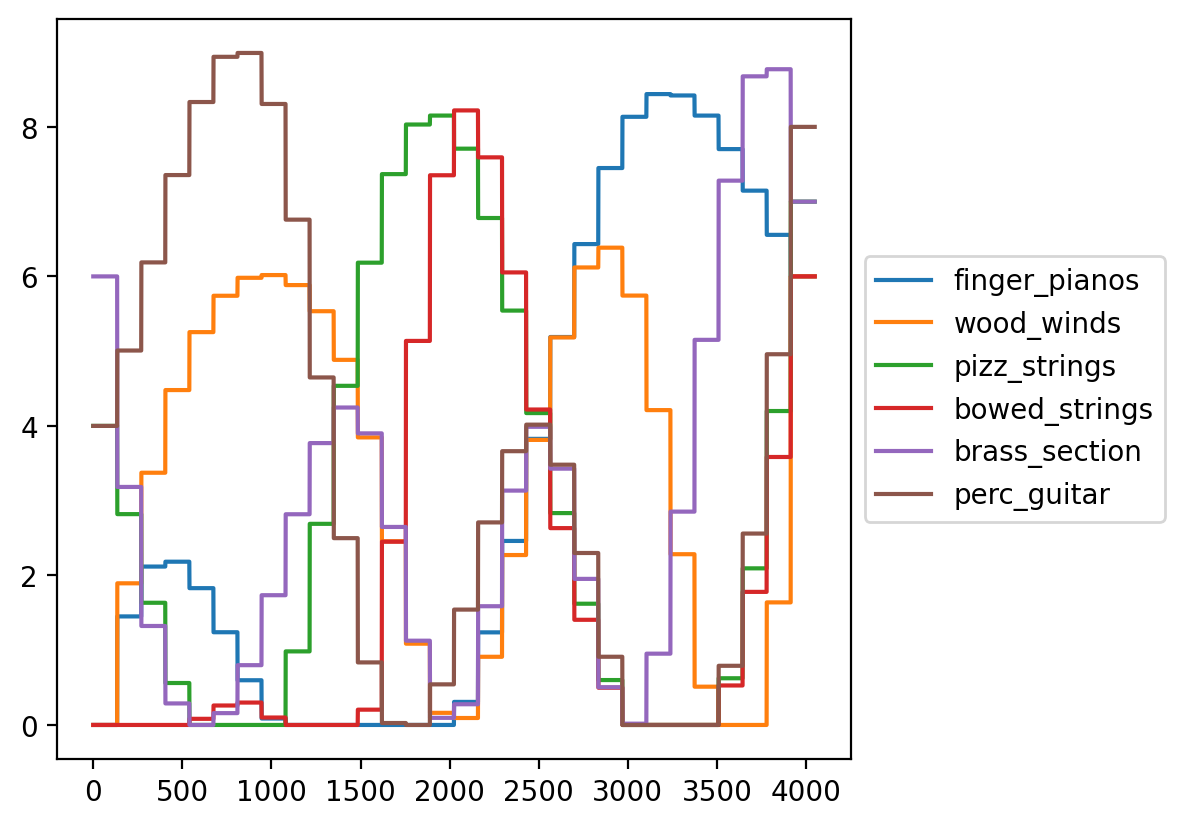

f# minor	D major	b minor	A major	A major	C# major	f# minor	f# minor	f# minor	A major	e minor	E major	f# minor	b minor	A major	A major
top_notes_dictionary[version] = array([[   9,    4,    1,   11,    6,    8,    2],
       [ 900,  402,   86, 1104,  584,  788,  198]])
repeats = 8
report the chords used, with chord scores
#		names of the notes	cents of notes		intervals between notes, the cents and ratios of the intervals		chord score
0 		['C♯', 'A♮', 'F♯', 'F♯']	[ 86 900 584 584]	(0, 1, 814, '8/5') (0, 2, 498, '4/3') (0, 3, 498, '4/3') (1, 2, 316, '6/5') (1, 3, 316, '6/5') (2, 3, 0, '1')		49.0
4 		['B♮', 'G♯', 'C♯', 'F♮']	[1055  788   86  472]	(0, 1, 267, '7/6') (0, 2, 969, '7/4') (0, 3, 583, '7/5') (1, 2, 702, '3/2') (1, 3, 316, '6/5') (2, 3, 386, '5/4')		61.0
8 		['A♮', 'F♯', 'C♯', 'F♯']	[900 584  86 584]	(0, 1, 316, '6/5') (0, 2, 814, '8/5') (0, 3, 316, '6/5') (1, 2, 498, '4/3') (1, 3, 0, '1') (2, 3, 498, '4/3')		49.0
12 		['B♮', 'E♮', 'B♮', 'G♯']	[1104  402 1104  788]	(0, 1, 702, '3

export SFDIR="../../../Music/sflib"
echo $SFDIR
ls $SFDIR -lth | head -n 10
ls: write error: Broken pipe
csound -U sndinfo $SFDIR/"$1".wav
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Jan 19 2023
[commit: none]
libsndfile-1.1.0
util sndinfo:
../../../Music/sflib/ball9.wav:
	srate 44100, stereo, 24 bit WAV, 546.401 seconds
	(24096285 sample frames)
end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance
Elapsed time at end of performance: real: 0.000s, CPU: 0.000s
csound "$1"c.csd 
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Jan 19 2023
[commit: none]
libsndfile-1.1.0
UnifiedCSD:  ball9c.csd
STARTING FILE
Creating options
Creating orchestra
closing tag
Creating score
rtaudio: pulseaudio module enabled
rtmidi: ALSA Raw MIDI module enabled
sorting score ...
	... done
graphics suppressed, ascii substituted
0dBFS level = 32768.0
orch now loaded
audio buffered in 256 sample-frame blocks
writing 1536-byte blk

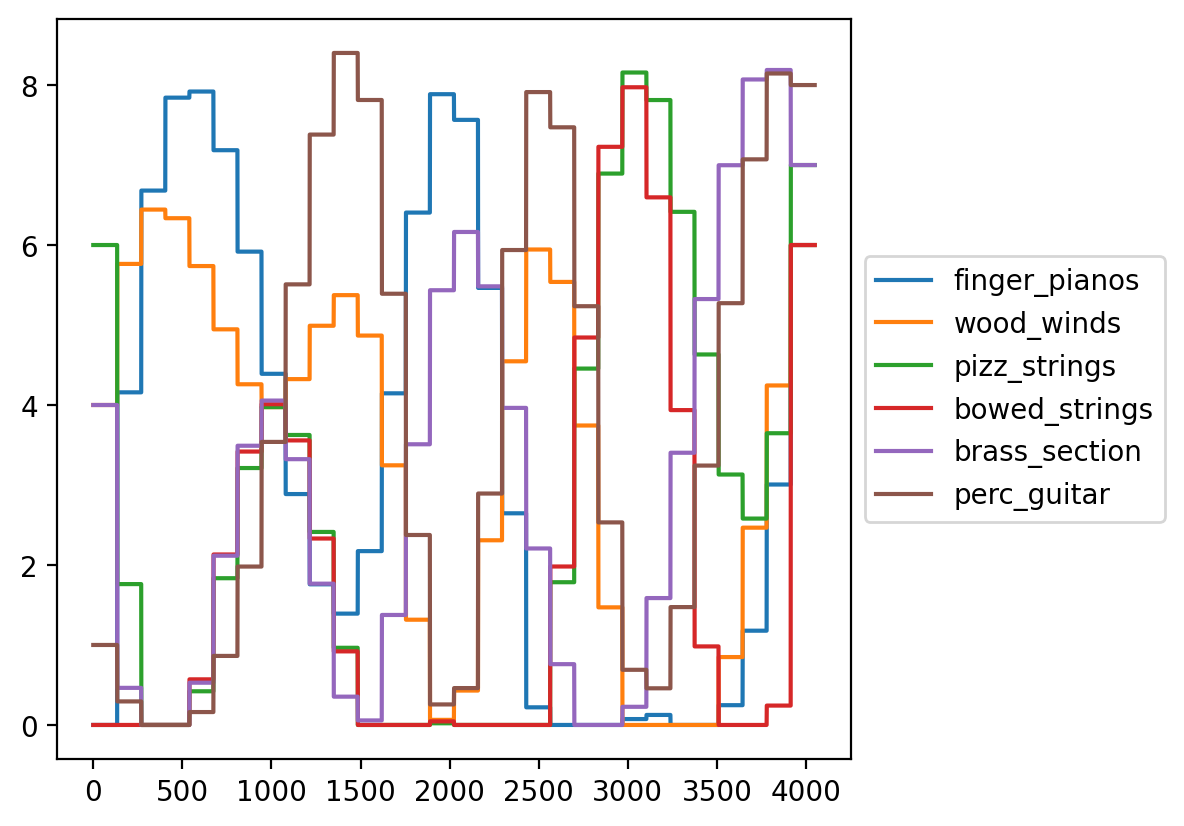

E- major	E- major	A- major	E- major	c minor	E- major	E- major	E- major	E- major	A- major	E- major	c minor	E- major	E- major	E- major	c minor	B- major	E- major	E- major	f minor	E- major	c minor	B- major	c minor	c minor	E- major	A- major	B- major	E- major
top_notes_dictionary[version] = array([[   3,   10,    7,    0,    2,    8],
       [ 300, 1002,  686, 1184,  188,  798]])
repeats = 12
report the chords used, with chord scores
#		names of the notes	cents of notes		intervals between notes, the cents and ratios of the intervals		chord score
0 		['E♭', 'B♭', 'G♮', 'E♭']	[ 300 1002  686  300]	(0, 1, 702, '3/2') (0, 2, 386, '5/4') (0, 3, 0, '1') (1, 2, 316, '6/5') (1, 3, 702, '3/2') (2, 3, 386, '5/4')		39.0
4 		['D♮', 'B♭', 'F♮', 'B♭']	[ 188 1002  504 1002]	(0, 1, 814, '8/5') (0, 2, 316, '6/5') (0, 3, 814, '8/5') (1, 2, 498, '4/3') (1, 3, 0, '1') (2, 3, 498, '4/3')		51.0
8 		['C♮', 'G♮', 'E♭', 'C♮']	[1184  686  300 1184]	(0, 1, 498, '4/3') (0, 2, 884, '5/3') (0, 3, 0, '1') (1, 2, 386, '5/4

export SFDIR="../../../Music/sflib"
echo $SFDIR
ls $SFDIR -lth | head -n 10
ls: write error: Broken pipe
csound -U sndinfo $SFDIR/"$1".wav
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Jan 19 2023
[commit: none]
libsndfile-1.1.0
util sndinfo:
../../../Music/sflib/ball9.wav:
	srate 44100, stereo, 24 bit WAV, 828.189 seconds
	(36523145 sample frames)
end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance
Elapsed time at end of performance: real: 0.001s, CPU: 0.001s
csound "$1"c.csd 
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Jan 19 2023
[commit: none]
libsndfile-1.1.0
UnifiedCSD:  ball9c.csd
STARTING FILE
Creating options
Creating orchestra
closing tag
Creating score
rtaudio: pulseaudio module enabled
rtmidi: ALSA Raw MIDI module enabled
sorting score ...
	... done
graphics suppressed, ascii substituted
0dBFS level = 32768.0
orch now loaded
audio buffered in 256 sample-frame blocks
writing 1536-byte blk

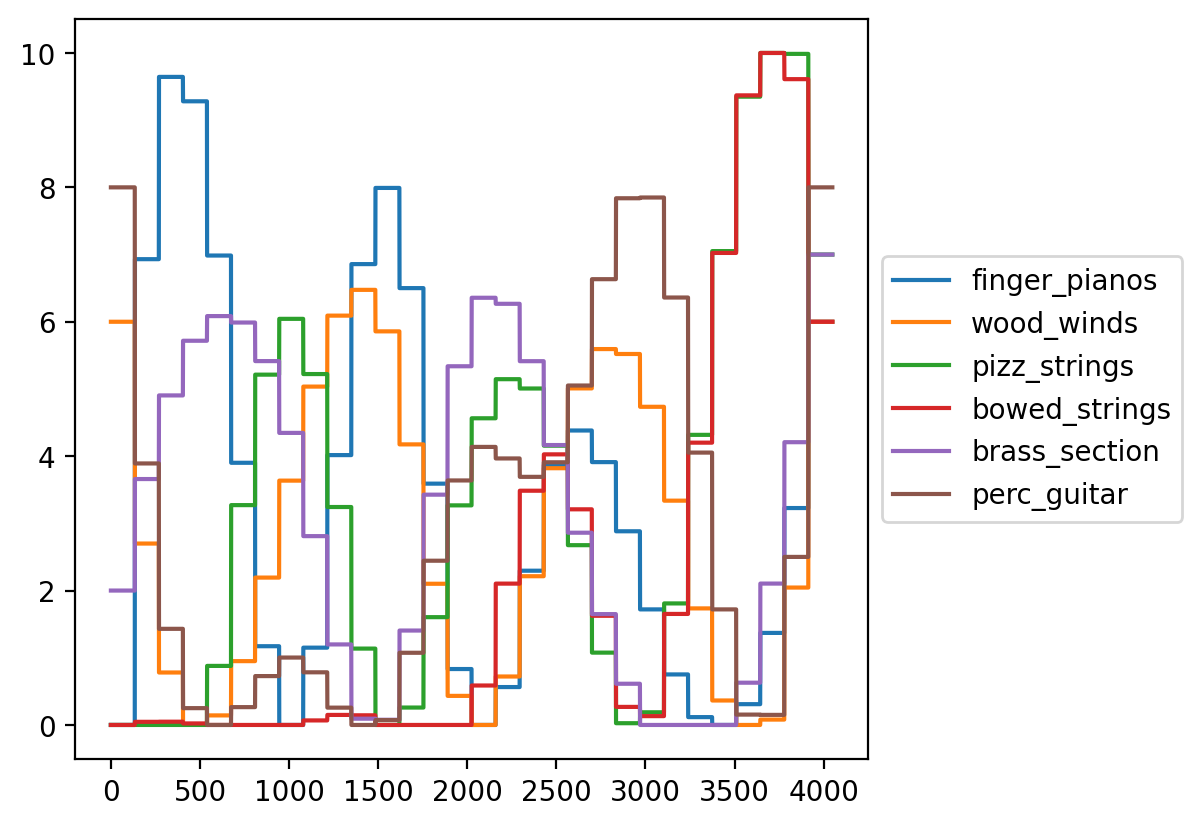

In [140]:
# here is where all the notebook cells defined above are called.
# specify the number of repeats, the voices, some initial chorale cent values, keys and other values
# keep track of what we have done so far
# bwv245.11 ✓  
# bwv245.14 ✓  
# bwv245.15 ✓    
# bwv245.17 ✓  
# bwv245.22 ✓  
# bwv245.26 ✓  
# bwv245.28 ✓  
# bwv245.3 ✓   
# bwv245.37 ✓  
# bwv245.40 ✓  
# bwv245.5 ✓   
reload(atu)
dmu.start_logger(JUPYTER_LOG)
for version in ["bwv245.28", "bwv245.14", "bwv245.40"]:
# for version in ["bwv245.11", "bwv245.14", "bwv245.15", "bwv245.17", "bwv245.22", "bwv245.26", "bwv245.28", "bwv245.3", "bwv245.37", "bwv245.5"]:
    for mod in ["f"]:
        chorale, root, mode, s = assign_chorale(version) # what chorale from the Music21 corpus will we use to build our chorale?
        # show_chorale(s) # show the chorale
        logging.info(f'{version = }, {mod = }')
        # initialize the chorale and the instruments
        repeats = rng.integers(8, high=16)
        print(f'{repeats = }')
        chorale, repeats, voice_time, keys, top_notes, stored_gliss, finger_pianos, wood_winds, pizz_strings, bowed_strings, brass_section, perc_guitar = initialize_chorale_and_instruments(chorale, root, mode, version, repeats)
        # returns: chorale, voice_time, keys, top_notes, stored_gliss, finger_pianos, wood_winds, pizz_strings, bowed_strings, brass_section, perc_guitar)
        logging.info(f'{chorale.shape = }, {len(voice_time) = }, {keys = }, {top_notes = }, {stored_gliss = }, {finger_pianos = }, {wood_winds = }, {pizz_strings = }, {bowed_strings = }, {brass_section = }, {perc_guitar = }')

        # choose the correct top_notes, tune the chorale, print the report
        
        # Tune the chorale based on the top_notes
        chorale_in_cents, tonal_diamond, ratio_factor = tune_chorale(chorale, top_notes, keys)
        logging.info(f'{chorale_in_cents.shape = }, {tonal_diamond.shape = }, {ratio_factor = }')
        print_report = True
        if print_report: atu.print_interval_cent_report(chorale_in_cents, chorale, top_notes, tonal_diamond, keys, ratio_factor)
        logging.info(f'{version = }') 
        # expand the chorale
        mask = True
        fing = True 
        wood = True
        octave_reduce = 1
        duration, volume_function = expand_chorale(repeats, chorale_in_cents, voice_time, finger_pianos, wood_winds, pizz_strings, bowed_strings, brass_section, perc_guitar, mask = mask, fing = fing, wood = wood, octave_reduce = octave_reduce)
        logging.info(f'{duration = }, {volume_function.shape = }, {len(voice_time) = }')
        # send the results to csound
        csound = True
        convolve = True
        if csound:
            result_of_call = play_csound(csound = True, play = False, ship = False)
            if result_of_call != 0: print(f'possible failure. {result_of_call = }')
        # convolve the results 
        if convolve:
            result_of_call = trim_csound(version, chorale_in_cents, duration, trim = True)
            if result_of_call != 0: print(f'possible failure. {result_of_call = }')
        display_volumes(volume_function)

In [141]:
from fractions import Fraction
print(f'{str(Fraction(np.power(2, 1/12))) = }')

str(Fraction(np.power(2, 1/12))) = '2385698798484657/2251799813685248'
